# Day 3 Sandbox and outline

1. PCA Basics with some 2D MVN data - intuition and linalg
1. PCA for dimensionality reduction
1. Show variance accounted for
1. Stock data - look at it, PCA, think


Other skills

1. Making plots for presentations (and generally making the plots nice)
1. Other resources
1. Ask us whatever questions you still have



sdf

1. Plots for presentations
2. PCA intution (2D MVN)
3. Dimensinoality reduction exmple + exercises  
    1. variance explained
4. Stock Example as exercise (until 8ish)
5. Other resources
6. Talking about whatever

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

#These are some matplot lib configurations that I like to use. 
mpl.rc("text", usetex=False) #if tou have Latex set this to true and matplotlib will render labels in latex
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111",
                     "savefig.facecolor": "212121"})

In [26]:
test = np.loadtxt('../data/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv',
                  delimiter=',',skiprows=1,usecols=1)

In [28]:
# Download the data from https://www.kaggle.com/camnugent/sandp500 

sp500_glob = glob.glob('../data/individual_stocks_5yr/individual_stocks_5yr/*.csv',)
names = []
prices = np.zeros((len(sp500_glob), test.shape[0]))
fails = []
for i,f in enumerate(sp500_glob):
    fname = f.split('/')[-1]
    names.append(fname.split('_')[0])
    try:
        prices[i] = np.loadtxt(f, delimiter=',',skiprows=1, usecols=1)
    except:
        fails.append(fname.split('_')[0])
        pass

In [47]:
price_changes = np.diff(prices)
real_price_changes = price_changes[price_changes.std(-1)>0]
real_names = np.array(names)[price_changes.std(-1)>0]
# Below is a pretty standard way of normalizing numerical data
normalized_price_changes = (real_price_changes - real_price_changes.mean(axis=-1,keepdims=True))/(real_price_changes.std(axis=-1,keepdims=True))

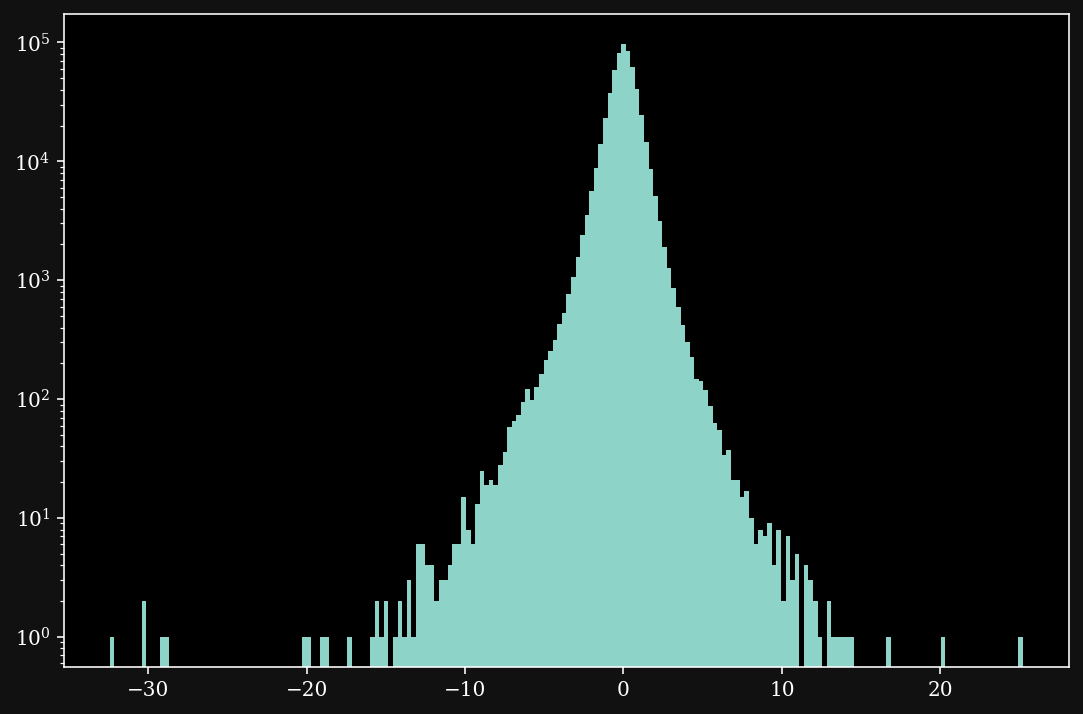

In [43]:
plt.hist(normalized_price_changes.ravel(),bins=200)
plt.semilogy()
plt.show()

In [44]:
covariance = np.cov(normalized_price_changes)

In [45]:
evals, evecs = np.linalg.eigh(covariance)

In [48]:
explained_var = evals/evals.sum()

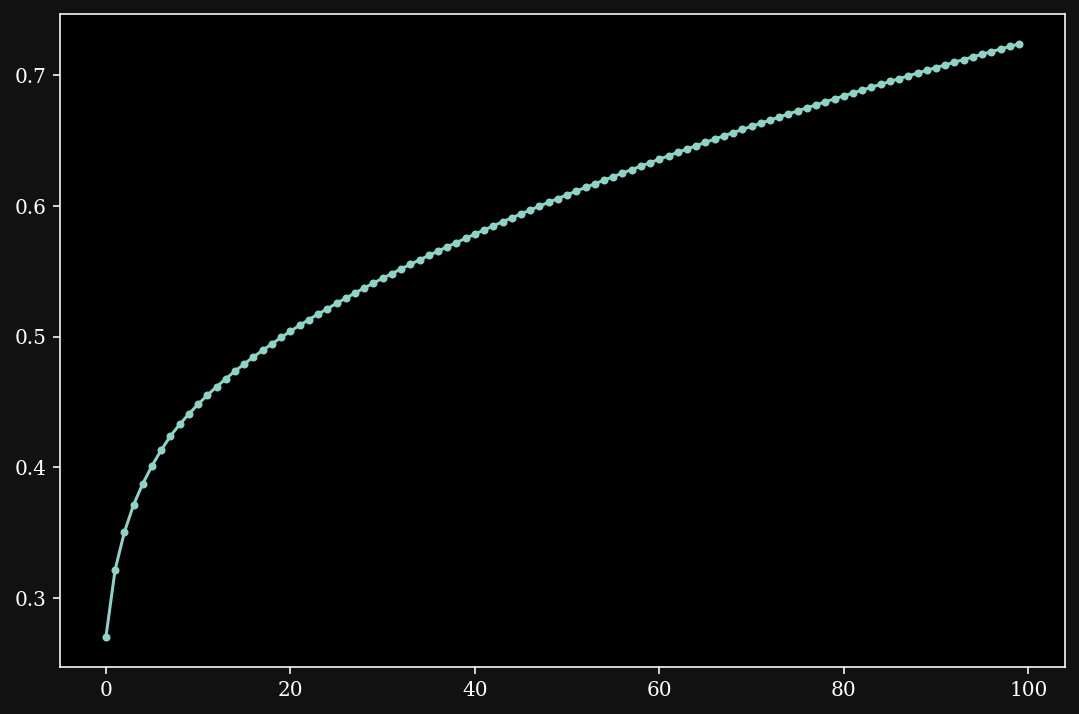

In [55]:
plt.plot(np.cumsum(explained_var[::-1][:100]),'o-',markersize=3)
plt.show()

In [7]:
n_pts = 1921
h = 24/n_pts
xx = np.linspace(-12,12,n_pts)

In [13]:
K = np.diag((2/h**2)*np.ones(n_pts)) - np.diag((1/h**2)*np.ones(n_pts-1),1) - np.diag((1/h**2)*np.ones(n_pts-1),-1)

V = np.diag(np.abs(xx))
H = K+V
H[0] = np.zeros(n_pts)
H[-1] = np.zeros(n_pts)

In [14]:
energies, states = np.linalg.eigh(H)

In [18]:
energies[2:8]

array([1.01912865, 2.33890495, 3.24929305, 4.08932524, 4.82170899,
       5.52239718])

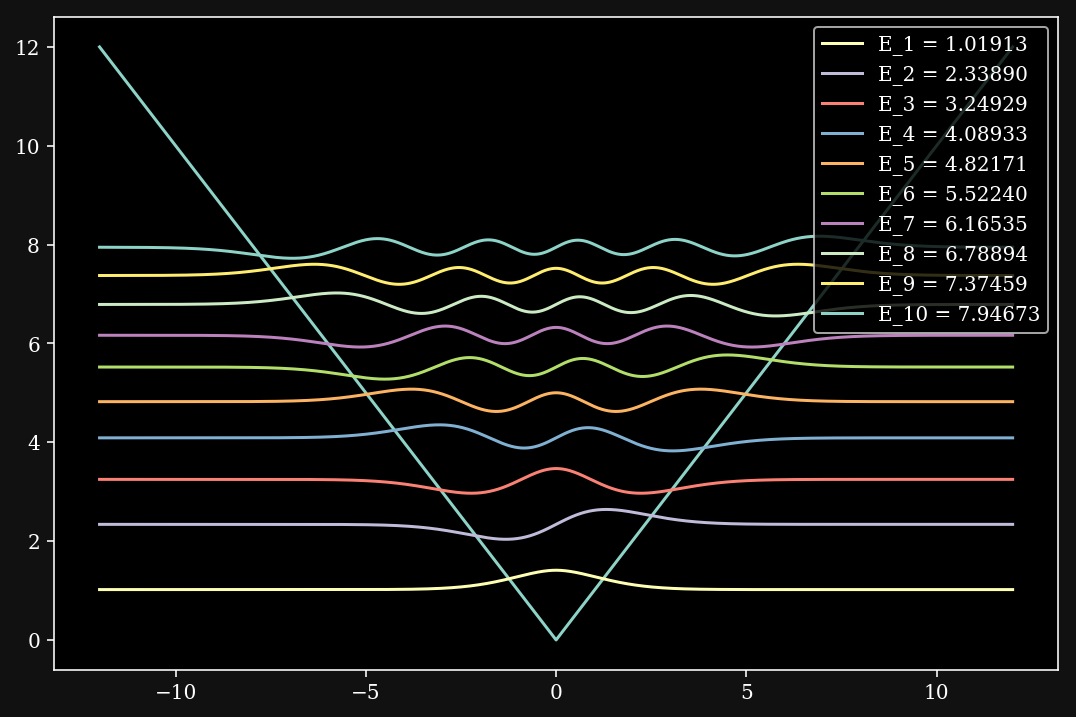

In [30]:
plt.plot(xx,np.abs(xx))
for i in range(2,12):
    plt.plot(xx, 5*states[:,i]+energies[i],label=f'E_{i-1} = {energies[i]:0.5f}')
plt.legend()
plt.show()
    

### The fastest crash course in Eigenvalues and Eigenvectors ***ever***

Given a square matrix $A$ in most cases there will exist some number of vectors $x_i$ and a corresponding set of scalars $\lambda_i$ such that 

$$ Ax_i = \lambda_i x_i.$$

We call the $x_i$'s *eigenvectors* and the $\lambda_i$'s *eigenvalues*. The process of computing the eigenvectors and eigenvalues is sometimes called *eigen-decomposition*.

What you should know about eigen-things
1. People have worked very hard to make computers perform eigendecomposition very well.
2. Many many problems in math and science boil down to computing the eigenvalues and eigenvectors of matrices.




## Workup to Principal Component Analysis - Variance and Covariance

Many of you have probably taken a statistics class and had to compute the variance or standard deviation of some data. As a refresher, if we have $N$ observations of a random variable $x$ then the variance is

$$\sigma^2 = \frac{1}{N}\sum_{n=1}^{N} (x_n-\mu)^2$$

Where $\mu$ is the mean or average of the $x$ values in the dataset.

The covariance generalizes this concept to the case where one is interested in multiple random variables that may be correlated. If $x$ and $y$ are random variables which we have observed $N$ times then we can say

$$\text{Cov}(x,y) = \frac{1}{N} \sum_{n=1}^{N} (x_n-\mu_x)(y_n -\mu_y).$$

Note the follwing important relations:

$$\text{Cov}(x,x) = \sigma^2_x$$
$$ \text{Cov}(x,y) = \text{Cov}(y,x).$$

In general if there are $M$ random variables lets call them $x^{(i)}$ that may be correlated it is quite convenient to consider a *Covariance matrix* this a matrix $C$ such that 

$$C_{i,j} = \text{Cov}(x^{(i)},x^{(j)}).$$

Note that the two identies discussed above imply that 
1. The diagonal elements of the covariance matrix are the variances of each variable and
1. The covariance matrix is symmetric and
1. For the mathematicians it is also positive definite since variances are always positive. 


The covariance of different variables in a dataset is one of the most important things one can learn about their data and there are lots of ways of using the information in the covariance matrix to analyze and understand the data. 

In [58]:
np.random
mean = np.array([4.5,3])
cov = np.array([[9, 5],
                [5, 8]])
vals, vecs = np.linalg.eigh(cov)

In [59]:
pts = np.random.multivariate_normal(mean, cov, size=300)

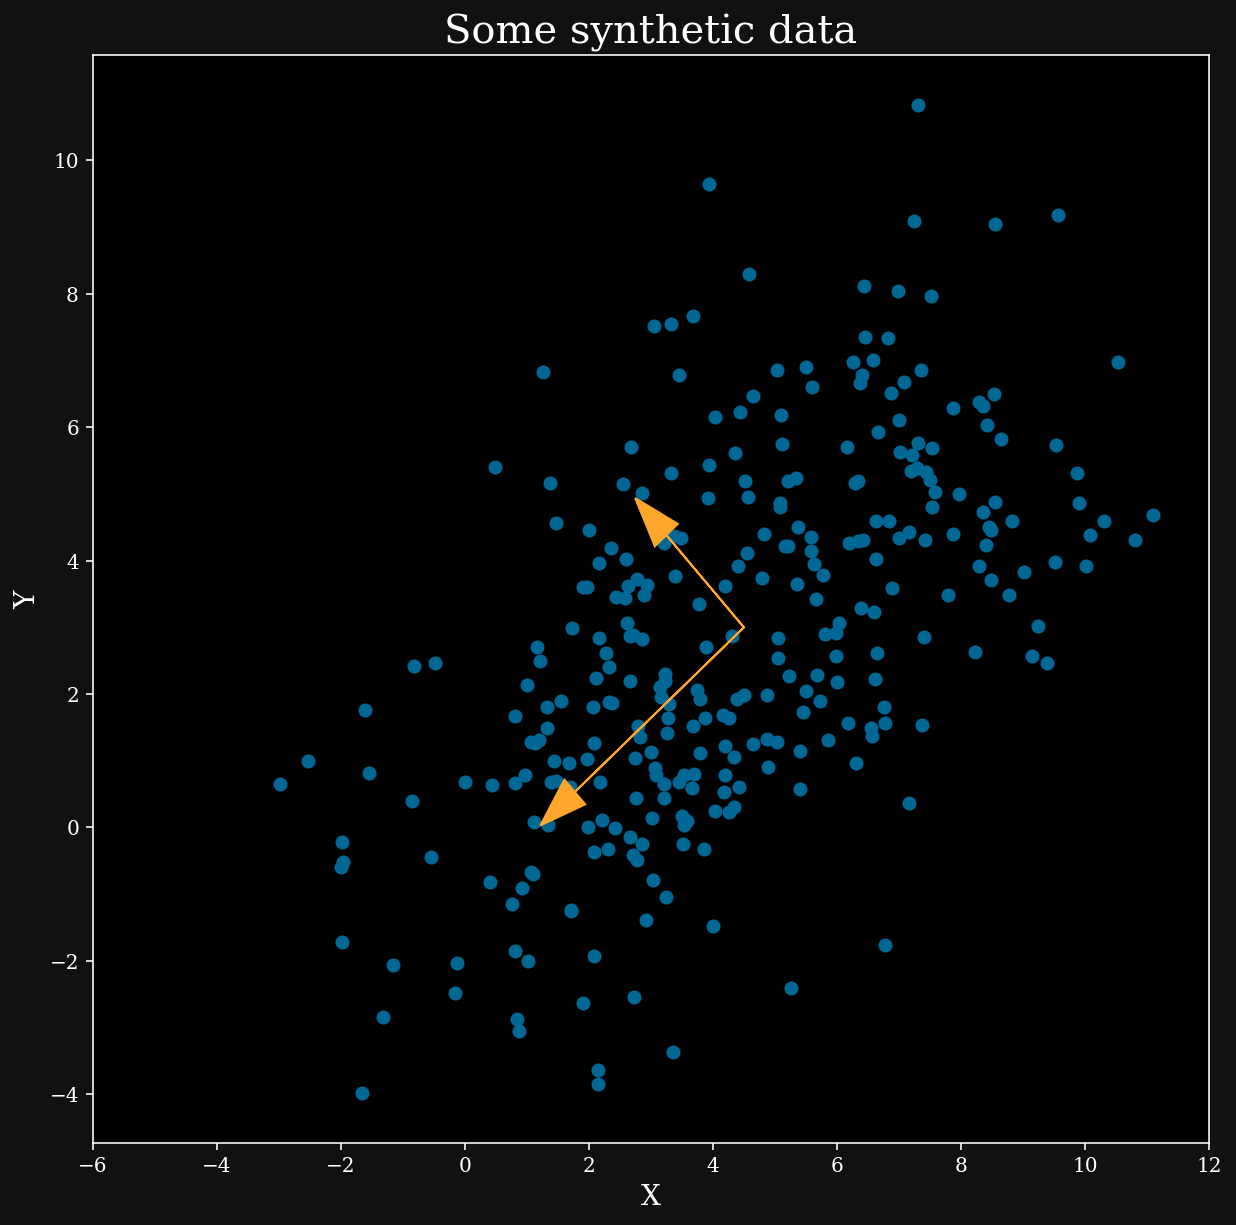

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(pts[:,0],pts[:,1], c='xkcd:peacock blue')
plt.title("Some synthetic data", fontsize=20)
plt.xlim([-5,13])
plt.xlim([-6,12])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.arrow(mean[0],mean[1],-np.sqrt(vals[0])*vecs[0,0],-np.sqrt(vals[0])*vecs[1,0],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.arrow(mean[0],mean[1],np.sqrt(vals[1])*vecs[0,1], np.sqrt(vals[1])*vecs[1,1],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.show()

In [61]:
transformed = pts@(vecs[:,::-1])

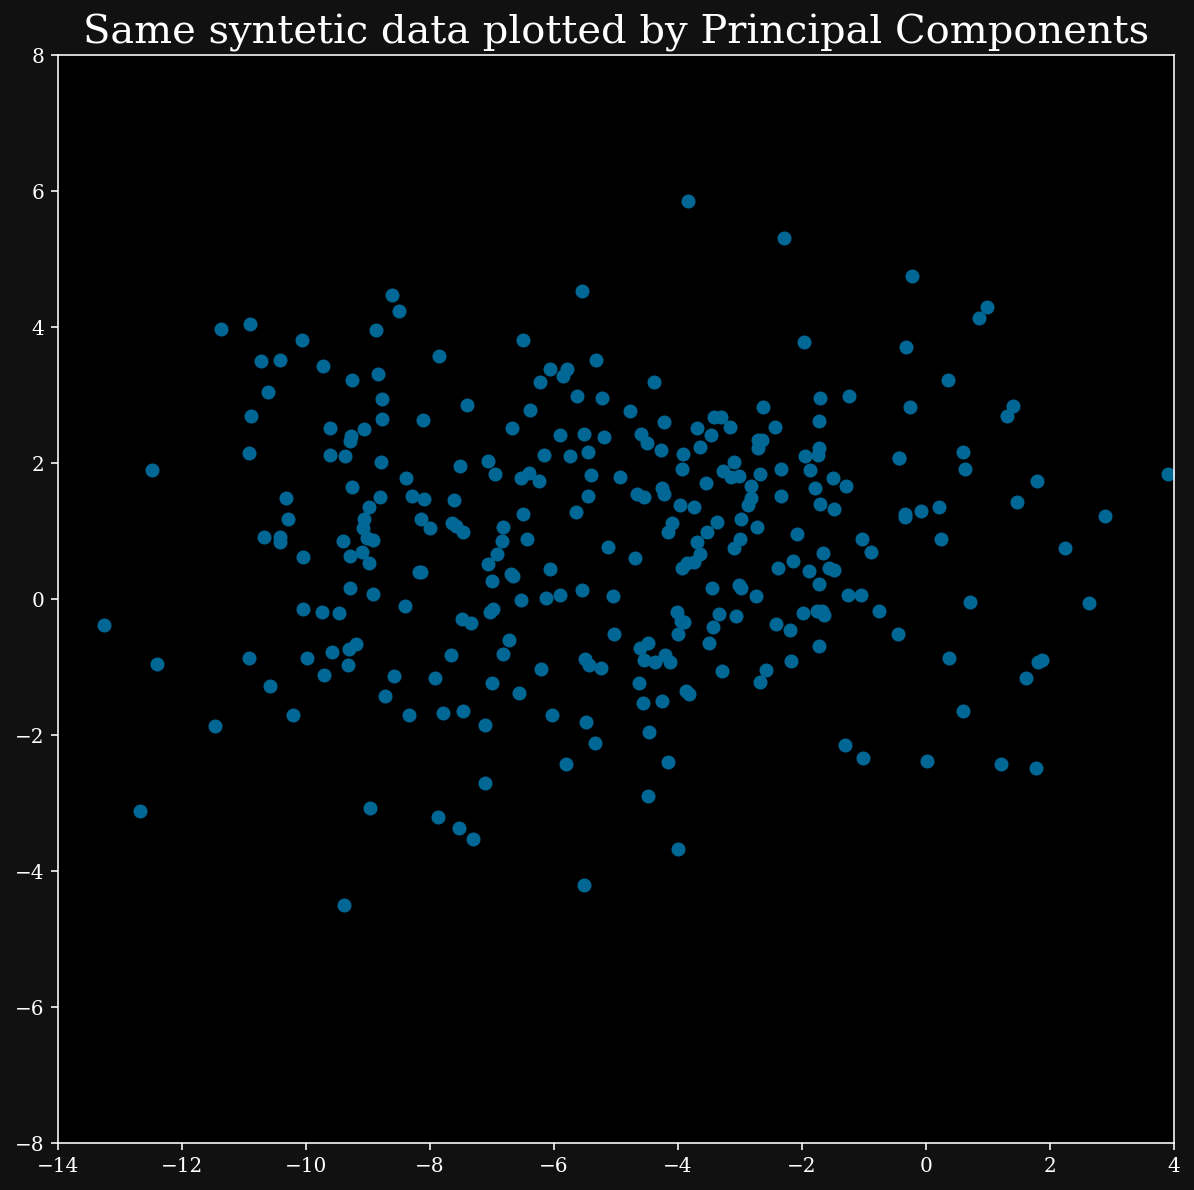

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0], transformed[:,1],c='xkcd:peacock blue')
plt.title("Same syntetic data plotted by Principal Components", fontsize=20)
plt.ylim([-8,8])
plt.xlim([-14,4])
plt.show()

## Notes about doing PCA in the real world

1. You should probably use the `scikit-learn` implementation. It does essentially the same thing but has a nicer interface. However, its not that hard to code up in general as long as you have a function to compute the covariance matrix for you and to perform the eigen-decomposition.

2. The convention 

In [77]:
vecs[:,::-1]

array([[-0.74145253,  0.67100532],
       [-0.67100532, -0.74145253]])